<a href="https://colab.research.google.com/github/DangPhan23/AI_W12_21_4_2023/blob/main/AI_W12_21_4_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 52.2 MB/s eta 0:00:00


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


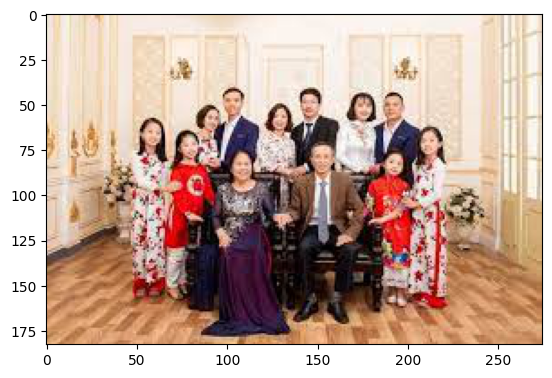

In [3]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
filename = '/content/drive/MyDrive/AI/anh.jpg'
img = plt.imread(filename)
plt.imshow(img)

In [4]:
dectector = MTCNN() #mo hinh quet
faces = dectector.detect_faces(img)
for face in faces:
  print(face)

1/1 [==============================] - 1s 502ms/step
{'box': [187, 47, 9, 10], 'confidence': 0.9930796027183533, 'keypoints': {'left_eye': (189, 50), 'right_eye': (193, 50), 'nose': (190, 52), 'mouth_left': (189, 55), 'mouth_right': (193, 55)}}
{'box': [147, 74, 10, 12], 'confidence': 0.9907488226890564, 'keypoints': {'left_eye': (150, 79), 'right_eye': (155, 79), 'nose': (153, 82), 'mouth_left': (151, 84), 'mouth_right': (156, 84)}}
{'box': [104, 79, 8, 11], 'confidence': 0.9861443042755127, 'keypoints': {'left_eye': (107, 83), 'right_eye': (111, 83), 'nose': (109, 86), 'mouth_left': (106, 88), 'mouth_right': (110, 88)}}
{'box': [142, 46, 8, 10], 'confidence': 0.9072181582450867, 'keypoints': {'left_eye': (143, 48), 'right_eye': (148, 49), 'nose': (145, 51), 'mouth_left': (143, 54), 'mouth_right': (147, 54)}}


1/1 [==============================] - 0s 379ms/step


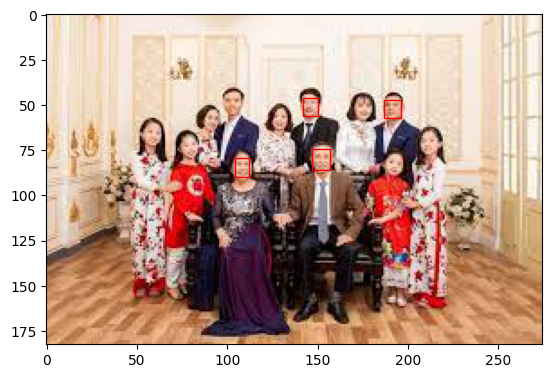

In [6]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
filename = '/content/drive/MyDrive/AI/anh.jpg'
img = plt.imread(filename)
dectector = MTCNN() #mo hinh quet
faces = dectector.detect_faces(img)
plt.imshow(img)
ax = plt.gca()
for face in faces:
  x,y,width,height = face['box']
  red = plt.Rectangle((x,y),width,height,fill = False, color = 'red')
  ax.add_patch(red)
  plt.savefig('/content/drive/MyDrive/AI/anh1.jpg')
plt.show()

3/3 [==============================] - 0s 57ms/step


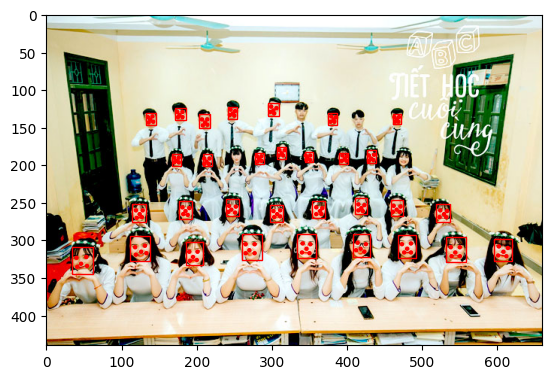

In [18]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
filename = '/content/drive/MyDrive/AI/anh22.jpg'
img = plt.imread(filename)
dectector = MTCNN() #mo hinh quet
faces = dectector.detect_faces(img)
plt.imshow(img)
ax = plt.gca()
for face in faces:
  x,y,width,height = face['box']
  red = plt.Rectangle((x,y),width,height,fill = False, color = 'red')
  ax.add_patch(red)
  plt.savefig('/content/drive/MyDrive/AI/anh232.jpg')
  for key,value in face['keypoints'].items():
    dot = plt.Circle(value,radius = 2, color = 'red')
    ax.add_patch(dot)
plt.show()

In [27]:
def draw_face(filename,result_list):
  data = plt.imread(filename)
  for i in range (len(result_list)):
    x1,y1,width,height = result_list[i]['box']#lay gia tri cua box cho vao bien
    x2,y2=x1 + width,y1 + height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
    plt.savefig('/content/drive/MyDrive/AI/anh2323.jpg')
  plt.show()


3/3 [==============================] - 0s 5ms/step


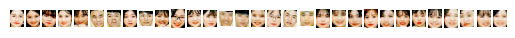

In [28]:
filename = '/content/drive/MyDrive/AI/anh22.jpg'
img = plt.imread(filename)
dectector = MTCNN() #mo hinh quet
faces = dectector.detect_faces(img)
draw_face(filename,faces)


In [30]:
#Classify ImageNet classes with ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/drive/MyDrive/AI/sua.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n01914609', 'sea_anemone', 0.43285307), ('n02526121', 'eel', 0.3102878), ('n01910747', 'jellyfish', 0.060851976)]


In [42]:
#Extract features with VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
import keras.utils as image
# # Tải mô hình VGG16 đã được đào tạo trên ImageNet do vat quan ao
model = VGG16(weights='imagenet')

# # Chuẩn bị hình ảnh của con vật cần nhận dạng
img_path = '/content/drive/MyDrive/AI/sua.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# # Sử dụng mô hình để dự đoán lớp của hình ảnh
preds = model.predict(x)
pred_classes = decode_predictions(preds, top=1)[0]
print('Predicted class:', pred_classes[0][1])

1/1 [==============================] - 0s 162ms/step
Predicted class: water_snake


In [37]:
#Extract features from an arbitrary intermediate layer with VGG19
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = '/content/drive/MyDrive/AI/sua.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)

1/1 [==============================] - 0s 125ms/step
